Aufgabe 7

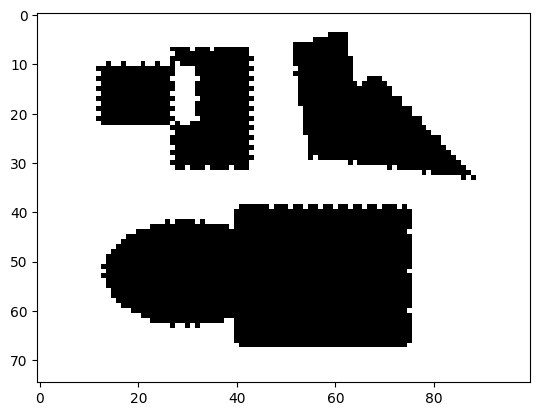

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from matplotlib.patches import Rectangle

# 1) Bild einlesen + Graustufen
image = io.imread('regionen1.png')
if image.ndim == 3 and image.shape[-1] == 4:
    image = image[..., :3]
gray = color.rgb2gray(image)

# 2) Otsu‐Threshold + Invert (schwarze Objekte = 1)
th = filters.threshold_otsu(gray)
binary = (gray < th).astype(np.uint8)

plt.imshow(image)
plt.show()

 Implementieren Sie die sequentielle Regionenmarkierung fur Binarbilder. Orientieren Sie
 sich bezuglich des Programmieransatzes an die Vorlesungsunterlagen (bzw. Buch Seite
 202).
 • Fur den Vektor an Kollisionen und den Vektor an Labels konnen in Python jeweils
 eine Liste von Sets angelegt werden.
 Bsp. Set in Python: a = set(); a.add(2); a.remove(2)
 Bsp. Liste in Python: l = list(); l.append(a); l.remove(a)
 • Das Eingangsbild muss zunachst in Binarform gebracht werden. (Achtung: Vorder
grund: 1 und Hintergrund: 0)

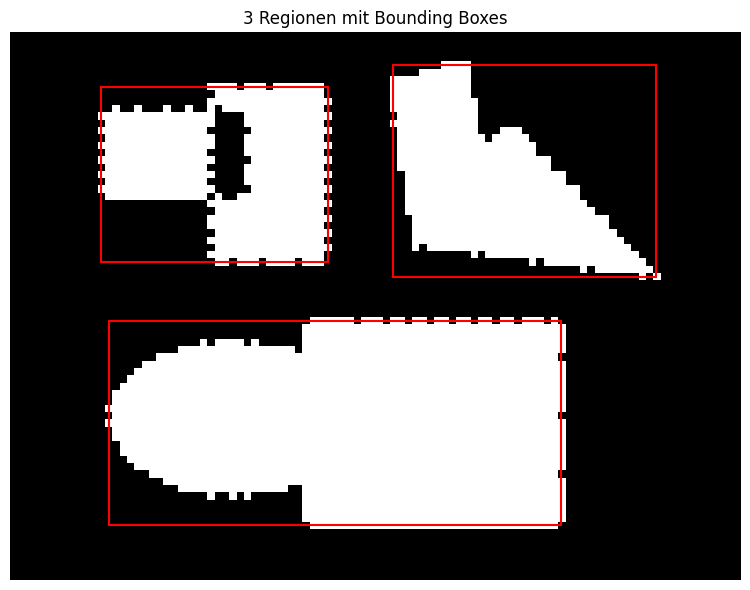

In [25]:
def sequential_labeling(I):
    H, W = I.shape
    labeled = I.copy().astype(int)
    m = 2
    C = set()
    def get_neighbors(u, v):
        Ns = []
        if v>0:
            if u>0:    Ns.append(labeled[v-1,u-1])
            Ns.append(labeled[v-1,u])
            if u<W-1:  Ns.append(labeled[v-1,u+1])
        if u>0:      Ns.append(labeled[v, u-1])
        return Ns

    # Pass 1
    for v in range(H):
        for u in range(W):
            if I[v,u] == 1:
                neigh = get_neighbors(u,v)
                labs = [x for x in neigh if x>1]
                if not labs:
                    labeled[v,u] = m; m += 1
                else:
                    k = min(labs)
                    labeled[v,u] = k
                    for o in labs:
                        if o!=k:
                            C.add(tuple(sorted((o,k))))
    # Pass 2
    R = [ {i} for i in range(2, m) ]
    def find_set(x):
        for s in R:
            if x in s: return s
    for a,b in C:
        Sa, Sb = find_set(a), find_set(b)
        if Sa is not Sb:
            Sa |= Sb
            R.remove(Sb)
    # Pass 3
    for v in range(H):
        for u in range(W):
            if labeled[v,u]>1:
                s = find_set(labeled[v,u])
                labeled[v,u] = min(s)
    return labeled

labeled = sequential_labeling(binary)

# 4) Bounding Boxes um jede Region
labels = np.unique(labeled)
labels = labels[labels>1]
boxes = []
for L in labels:
    pts = np.argwhere(labeled==L)
    r0, c0 = pts.min(axis=0)
    r1, c1 = pts.max(axis=0)
    boxes.append((c0, r0, c1, r1))

# 5) Darstellung: reines SW + rote Kästen
fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(binary, cmap='gray')
for x0,y0,x1,y1 in boxes:
    rect = Rectangle((x0,y0), x1-x0, y1-y0,
                     edgecolor='red', facecolor='none', linewidth=1.5)
    ax.add_patch(rect)
ax.set_title(f"{len(boxes)} Regionen mit Bounding Boxes")
ax.axis('off')
plt.tight_layout()
plt.show()